In [1]:
%pylab nbagg
%load_ext autoreload

%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [7]:
import sys
import os
import tigre
from scipy.signal import fftconvolve

import fastcat.fastcat as fc

dose = 0.01

phan_map_hard =  ['air','water','water','water',
             'water','water','water','water']


phan_map_g4 = ['air','water','G4_LUNG_ICRP',"G4_BONE_COMPACT_ICRU","G4_BONE_CORTICAL_ICRP","G4_ADIPOSE_TISSUE_ICRP","G4_BRAIN_ICRP","G4_B-100_BONE"] 

spectrum_files = ['Al_spectrum_25', 'C_spectrum_6', 'Al_spectrum_6', 'C_spectrum_25', 'W_spectrum_6', 'W_spectrum_25']

dets = [
 'CsI-784-micrometer',
 'CWO-784-micrometer',
 'CuGOS-784-micrometer']
phan_map = [phan_map_hard]#,phan_map_soft]

res = []

angles = np.linspace(0,2*pi,2)

geo = 'catphan_low_contrast_512'

phantom = fc.Catphan_515()

for spectrum_file in spectrum_files[1:4]:
    for det in dets:
        s = fc.Spectrum()
        s.load(spectrum_file)

        kernel = fc.Kernel(s, det)

#             kernel.add_focal_spot(0.1)

        energy_deposition_file = os.path.join(
            fc.data_path, "Detectors", det, 'EnergyDeposition.npy')
        energies = s.x
        fluence = s.y
        deposition_efficiency_file = energy_deposition_file

        res.append(phantom.return_projs(kernel,s,angles,
                                   nphoton=None,
                                  mgy=dose,return_dose=True))

#             img_fc = tigre.algorithms.FDK(
#                 np.transpose(np.array(projs_fc[0]),[0,2,1]), phantom.geomet,angles)

#             res.append([[phan_map,spectrum_file,det],phantom.analyse_515(img_fc[5])])

(19, 19, 19) 19
really doing it!
ratio is 33.360086116801796 number of photons 0.2630954767603633
(17, 25, 25) 17
really doing it!
ratio is 33.432035036182405 number of photons 0.6307006310084022
(19, 41, 41) 19
really doing it!
ratio is 33.38254623939319 number of photons 0.03243039447096263
(19, 19, 19) 19
really doing it!
ratio is 29.831002294213516 number of photons 0.19854340933738437
(17, 25, 25) 17
really doing it!
ratio is 29.89856828893736 number of photons 0.5981074830298064
(19, 41, 41) 19
really doing it!
ratio is 29.852416983183062 number of photons 0.03402763640736402
(19, 19, 19) 19
really doing it!
ratio is 6.168294804016911 number of photons 0.43032196849317317
(17, 25, 25) 17
really doing it!
ratio is 6.177190192698205 number of photons 0.7572855840763743
(19, 41, 41) 19
really doing it!
ratio is 6.191778788659147 number of photons 0.04026543917603216


In [9]:
from scipy.stats import poisson

<IPython.core.display.Javascript object>


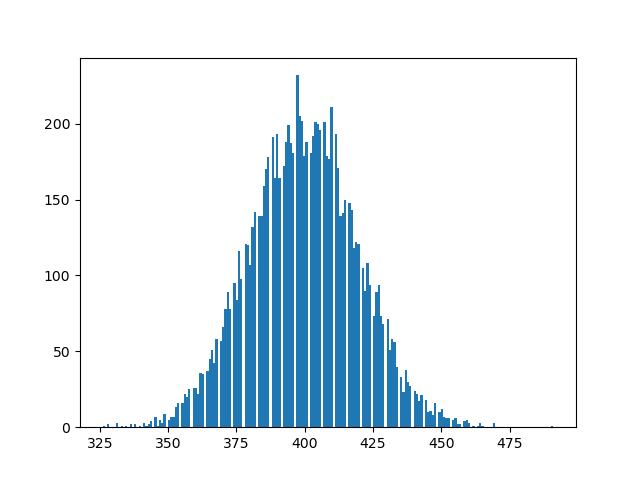

<IPython.core.display.Javascript object>


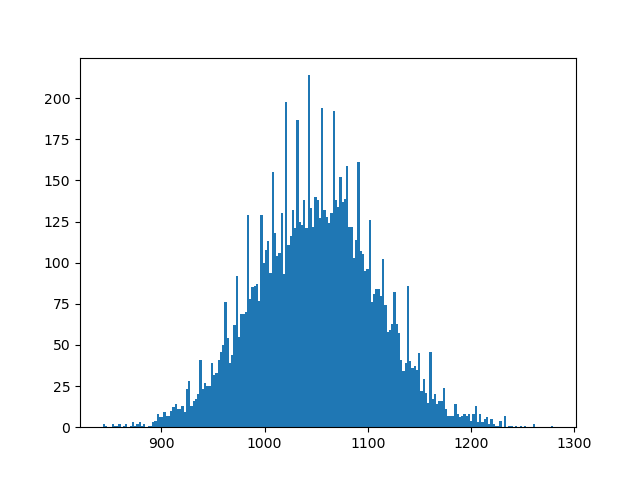

(array([  2.,   1.,   0.,   0.,   2.,   1.,   1.,   2.,   0.,   1.,   2.,
          0.,   1.,   3.,   1.,   2.,   3.,   1.,   2.,   0.,   1.,   1.,
          3.,   4.,   8.,   6.,   6.,   9.,   7.,   7.,  10.,  12.,  14.,
         11.,  11.,  13.,   9.,  23.,  28.,  13.,  16.,  17.,  20.,  41.,
         23.,  27.,  25.,  25.,  39.,  32.,  33.,  41.,  46.,  50.,  76.,
         54.,  39.,  44.,  62.,  92.,  55.,  69.,  69.,  70., 129.,  78.,
         85.,  86.,  87.,  77., 129., 100., 108., 113.,  94., 155., 118.,
        104., 106., 130.,  93., 198., 111., 116., 132., 121., 187., 125.,
        123., 138., 121., 214., 133., 122., 140., 138., 127., 194., 132.,
        128., 124., 130., 192., 138., 134., 152., 137., 139., 159., 122.,
        122., 103., 114., 161., 107., 105.,  95.,  96., 126.,  76.,  81.,
         84.,  84.,  80., 102.,  74.,  58.,  59.,  63.,  82.,  63.,  57.,
         41.,  34.,  39.,  86.,  40.,  36.,  37.,  35.,  45.,  22.,  29.,
         21.,  15.,  46.,  17.,  20., 

In [19]:
a = np.random.poisson(50,[10000])
b = np.random.poisson(250,[10000])
c = np.random.poisson(100,[10000])

plt.figure()
plt.hist(a+b+c,bins=200)

plt.figure()
plt.hist(a+2*b+5*c,bins=200)